# Project

## Abstract
We took a look at how the extreme solutions of the free energy equation behave with respect to the temperature and check what happens when we couple the bands with one another. 
We checked that for the first coupling term, $\nu(|\psi_1|^2|\psi_2|^2)$, as when a field is aproximately constant, the coupling term becomes a first order field and it alters direcly the effective critical temperature, shifting the critical temperature of each band. 
As for the second term, $-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*)$, we checked that depending on the coupling parammeter, $\eta$, the field with the lowest critical temperature, leaves it's usual behavior, when $\eta=0$, and starts approaching the other field's critical temperature.

## Introduction

The free energy, $F$, of a superconductor describes the superconducting transition and can be expressed in terms of a  complex   order parameter  field, $\psi(r) = |\psi(r)|e^{i\phi(r)}$, where the quantity $|\psi(r)|^2$ is a measure of the local density, like a quantum mechanics  wave function <ref name=":0" /> and $\psi(r)$ is nonzero below a phase transition into a superconducting state. The usual free energy equation is expressed as

$$ F = F_n + \alpha |\psi|^2 + \frac{\beta}{2} |\psi|^4 + \frac{1}{2m^*} \left| \left(-i\hbar\nabla - \frac{q^*}{c}\mathbf{A} \right) \psi \right|^2 + \frac{|\mathbf{B}|^2}{8\pi} $$


where $F_n$ is the free energy in the normal phase, $α$ and $β$ in the initial argument were treated as phenomenological parameters, $m$ is an  effective mass (solid-state physics)|effective mass, $e$ is the charge of an electron, $A$ is the  magnetic vector potential , and $\mathbf{B}=\nabla \times \mathbf{A}$ is the magnetic field. By minimizing the free energy with respect to variations in the order parameter and the vector potential, one arrives at the Ginzburg–Landau equations, which can be useful to determine the field, $\psi$, in terms of the temperature, due to expressing, $\alpha=\alpha_0(T-T_c)$.
In this project, we are going to consider a third order field, to the field $\psi_2$ , and some new coupling terms, where the fields are uniform, and there are no eletric nor magnetic fields, and so the full free energy equation is
$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6+\nu(|\psi_1|^2|\psi_2|^2)-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*),$$
with $\alpha_0>0$, $\beta>0$, $\gamma>0$, $\nu<0$ and $\eta>0$ 
 






## Constants

In [52]:
clear all

alpha_0 = 2;
beta = 5;
gama = 1;
v=-2;
n = 0.5;

%Band critical temperatures (for no coupling term)
Tc1 = 130;
Tc2 = 100;

%simulation constants
Tf = 180;
dT = 0.05;
dPsi = 0.02;
T = 0:dT:Tf;

In [53]:
alpha_1 = @ (T) alpha_0 * (T-Tc1);
alpha_2 = @ (T) alpha_0 * (T-Tc2);

## Free energy equations

### Free energy of 2 bands (First and Second order)

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)$$


$$\frac{dF}{d|\psi_{1,2}|}=2\alpha_{1,2}\psi_{1,2}+2\beta|\psi_{1,2}|^2\psi_{1,2}=0\Leftrightarrow \psi_{1,2}(\alpha_{1,2}+\beta|\psi_{1,2}|^2)=0\Leftrightarrow|\psi_{1,2}|=\pm \sqrt{-\frac{\alpha_{1,2}}{\beta}}$$

In [54]:
psi1=@(T) (T<Tc1).* sqrt(-alpha_1(T)/beta);
psi2=@(T) (T<Tc2).* sqrt(-alpha_2(T)/beta);

psi2_nocoupto=psi2(T);
psi1_nocoupto=psi1(T);

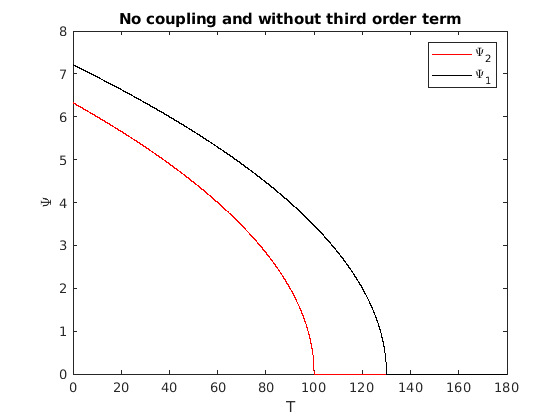

In [55]:
plot(T(1:length(psi2_nocoupto)),psi2_nocoupto,'r')
hold on
plot(T(1:length(psi1_nocoupto)),psi1_nocoupto,'k')
title('No coupling and without third order term')
legend('\Psi_2','\Psi_1')
xlabel('T')
ylabel('\Psi')

### Free energy with a third order term

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6$$

Let's minimize the equation by deriving with respect to $|\psi_{1,2}|$, we get,$$\frac{dF}{d|\psi_2|}=\psi(\alpha_2+\beta|\psi|^2+\gamma|\psi|^4)=0 \Leftrightarrow |\psi_2|=\pm\sqrt{\frac{-\beta\pm\sqrt{\beta^2-4\alpha_2\gamma}}{2\gamma}}$$
$$\frac{dF}{d|\psi_1|}=2\alpha_1|\psi_1|+2\beta|\psi_1|^3=0\Leftrightarrow |\psi_1|(\alpha_1+\beta|\psi_1|^2)=0\Leftrightarrow|\psi_1|=\pm \sqrt{-\frac{\alpha_1}{\beta}}$$

We are only interested in the positive solutions, so we are going to ignore the negative ones, and ignore the complex solutions.

In [56]:
psi1=@(T) (T<Tc1).* sqrt(-alpha_1(T)/beta);
psi2= @(T) (T<Tc2).* sqrt((-beta+sqrt(beta^2-4*alpha_2(T)*gama))/(2*gama));

psi2_nocoup=psi2(T);
psi1_nocoup=psi1(T);

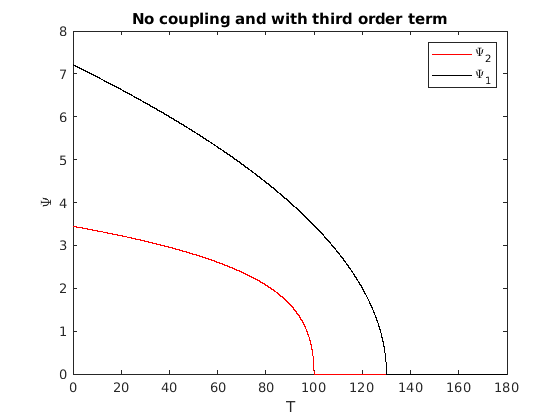

In [57]:
plot(T(1:length(psi2_nocoup)),psi2_nocoup,'r')
hold on
plot(T(1:length(psi1_nocoup)),psi1_nocoup,'k')
title('No coupling and with third order term')
legend('\Psi_2','\Psi_1')
xlabel('T')
ylabel('\Psi')

### Free energy with a coupling and without a third order term

#### $F_{\psi_1\psi_2}=-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*)$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)-\eta(\psi_1\psi_2^*+\psi_2\psi_1^*)$$

It's painfully hard, to find the extreme solutions of this free energy equation analytically, and so we have to solve it using numerical methods. But even tho we can still simplify this a bit, checking it's derivative with $\phi_1$
$$\frac{\partial F}{\partial \phi}=2|\psi_1||\psi_2|sin(\phi_1-\phi_2)=0 \Leftrightarrow \phi_1=\phi_2$$
and so the coupling term gets reduced to
$$F_{\psi_1\psi_2}=-2\eta|\psi_2||\psi_1|$$

In [58]:
%%file solve_F.m

function [output] = solve_F(alpha_0,beta,gama,n,Tc1,Tc2,T,PsiMax,PsiMin,dPsi)
    alpha_1 = @ (T) alpha_0 * (T-Tc1);
    alpha_2 = @ (T) alpha_0 * (T-Tc2);
    
    F_funct = @(psi1,psi2) alpha_1(T) * psi1^2 + alpha_2(T) * psi2^2 + beta*(psi1^4+psi2^4)/2 + gama*( psi2^6 ) / 3 - n * ( 2 * psi1 * psi2 );
    
    
    k = 0;
    mins = [];
    i = 0;
    Psi = PsiMin-4*dPsi:dPsi:PsiMax+4*dPsi;
    for psi_1 = Psi
        i=i+1;
        g=0;
        for psi_2 = Psi
            g=g+1;
            F(i,g) = F_funct(psi_1,psi_2);
            % FIND MINIMUM
            if i > 2 && g > 2
                if(F(i-2,g-2) > F(i-1,g-1) && F(i-1,g-2) > F(i-1,g-1) && F(i,g-2) > F(i-1,g-1) && F(i-2,g-1) > F(i-1,g-1) && F(i,g-1) > F(i-1,g-1) && F(i-2,g) > F(i-1,g-1) && F(i-1,g) > F(i-1,g-1) && F(i,g) > F(i-1,g-1))
                    k=k+1;
                    mins(k,:) = [Psi(i-1),Psi(g-1)];
                end                
            end
        end
    end
    
    if k == 0
        output = [0,0];
    else
        output = mins(k,:);
    end
end

Created file '/home/parracho/Projeto_daf/solve_F.m'.


In [59]:
psi_1 = zeros(Tc1/dT-1,1);
psi_2 = zeros(Tc1/dT-1,1);

%Find Psi(T) values

PsiMax = 8; 
PsiMin = 0;

i = 0;
for t = T
    i=i+1;

    out = solve_F(alpha_0,beta,0,n,Tc1,Tc2,t,PsiMax,PsiMin,dPsi);
    psi_1(i) = out(1);
    psi_2(i) = out(2);
    PsiMax = max([psi_1(i),psi_2(i)]) * (1.3);
    PsiMin = min([psi_1(i),psi_2(i)]) * (0.30);
end

psi_1_noto_n=psi_1;
psi_2_noto_n=psi_2;

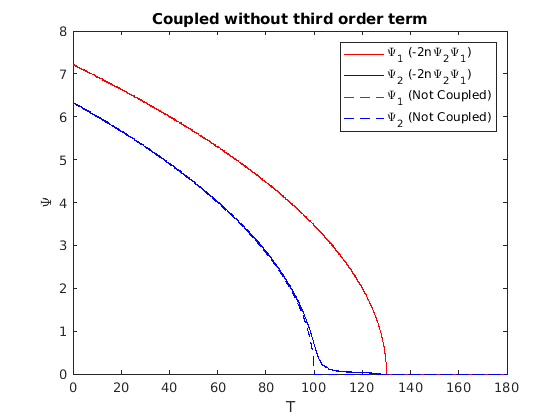

In [60]:
plot(T(1:length(psi_1_noto_n)),psi_1_noto_n,'r')
hold on
plot(T(1:length(psi_2_noto_n)),psi_2_noto_n,'b')

plot(T,psi1_nocoupto,'r--')
plot(T,psi2_nocoupto,'b--')
title("Coupled without third order term")
legend('\Psi_1 (-2n\Psi_2\Psi_1)','\Psi_2 (-2n\Psi_2\Psi_1)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')
xlabel('T')
ylabel('\Psi')

#### $F_{\psi_1\psi_2}=\nu(|\psi_1|^2|\psi_2|^2)$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+\nu(|\psi_1|^2|\psi_2|^2)$$

To find the extreme points we take the derivative of the free energy with respect to $|\psi_i|$,$$\frac{dF}{d|\psi_i|}=\alpha_i|\psi_i|+\beta|\psi_i|^3+\nu|\psi_j|^2|\psi_i|=0 \Leftrightarrow $$
$$\Leftrightarrow |\psi_i|(\alpha_i+\beta|\psi_i|^2+\nu|\psi_j|^2)=0\Leftrightarrow |\psi_i|=0 \vee \alpha_i+\beta|\psi_i|^2+\nu|\psi_j|^2=0 $$
$$\Leftrightarrow |\psi_i|=0 \vee \left\{\begin{array}{c} |\psi_i|^2= -\frac{1}{\beta}(\alpha_i+\nu|\psi_j|^2) \\ |\psi_j|^2=-\frac{1}{\nu}(\alpha_i+\beta|\psi_i|^2)\end{array}\right.$$
with $j\neq i$.
$$\left\{\begin{array}{c} |\psi_1|^2=-\frac{1}{\beta}(\alpha_1+\nu|\psi_2|^2) \\ |\psi_1|^2=-\frac{1}{\nu}(\alpha_2+\beta|\psi_2|^2)\end{array}\right. \Leftrightarrow \left\{\begin{array}{c} |\psi_2|^2=\frac{\beta\alpha_2-\nu\alpha_1}{\nu^2-\beta^2} \\ |\psi_1|^2=-\frac{\beta\alpha_1+\nu\alpha_2}{\nu^2-\beta^2}\end{array}\right.$$

In [61]:

psi_1 = @(T) sqrt((-alpha_1(T)*v+beta*alpha_2(T))/(v^2-beta^2));
psi_2 = @(T) sqrt((alpha_1(T)*beta-v*alpha_2(T))/(v^2-beta^2));

psi_1_noto_v=psi_1(T);
psi_2_noto_v=psi_2(T);

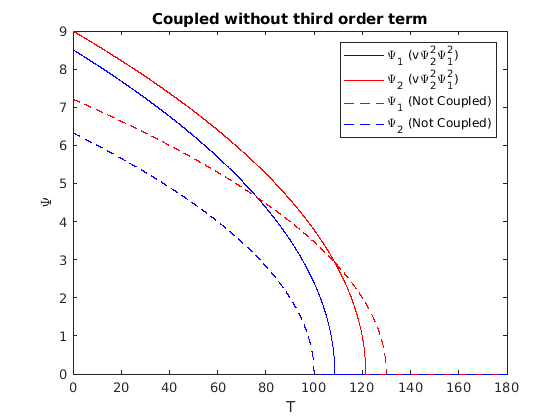

In [62]:
plot(T,psi_1_noto_v,'b')
hold on
plot(T,psi_2_noto_v,'r')

plot(T,psi1_nocoupto,'r--')
plot(T,psi2_nocoupto,'b--')
title('Coupled without third order term')
legend('\Psi_1 (v\Psi_2^2\Psi_1^2)','\Psi_2 (v\Psi_2^2\Psi_1^2)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')

xlabel('T')
ylabel('\Psi')


### Free energy with coupling and third order term

#### $F_{\psi_1\psi_2}=-2\eta|\psi_2||\psi_1|$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6-2\eta|\psi_2||\psi_1|$$

As mentioned before, and with the new third order term it's even more difficult to determine the extreme solutions, and so we are going to find them numerically.

In [63]:
psi_1 = zeros(Tc1/dT-1,1);
psi_2 = zeros(Tc1/dT-1,1);

%Find Psi(T) values

PsiMax = 8; 
PsiMin = 0;

i = 0;
for t = T
    i=i+1;

    out = solve_F(alpha_0,beta,gama,n,Tc1,Tc2,t,PsiMax,PsiMin,dPsi);
    psi_1(i) = out(1);
    psi_2(i) = out(2);
    PsiMax = max([psi_1(i),psi_2(i)]) * (1.3);
    PsiMin = min([psi_1(i),psi_2(i)]) * (0.30);
end

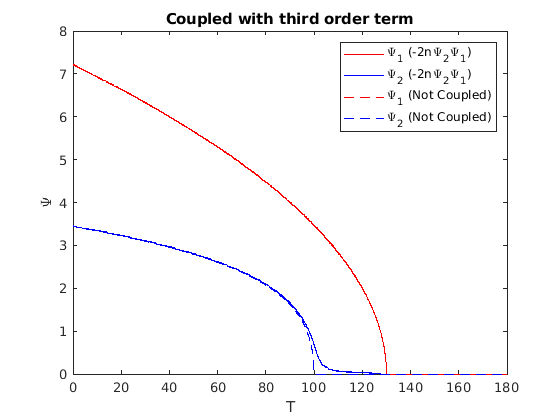

In [64]:
plot(T(1:length(psi_1)),psi_1,'r')
hold on
plot(T(1:length(psi_2)),psi_2,'b')

plot(T,psi1_nocoup,'r--')
plot(T,psi2_nocoup,'b--')
title("Coupled with third order term")
legend('\Psi_1 (-2n\Psi_2\Psi_1)','\Psi_2 (-2n\Psi_2\Psi_1)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')
xlabel('T')
ylabel('\Psi')

#### $F_{\psi_1\psi_2}=\nu(|\psi_1|^2|\psi_2|^2)$

$$F=\alpha_1|\psi_1|^2+\alpha_2|\psi_2|^2+\frac{\beta}{2}(|\psi_1|^4+|\psi_2|^4)+ \frac{\gamma}{3}|\psi_2|^6+\nu(|\psi_1|^2|\psi_2|^2)$$

To find the extreme points we take the derivative of the free energy with respect to {$|\psi_1|,|\psi_2|$},
$$\frac{dF}{d|\psi_1|}=2\alpha|\psi_1|+2\beta|\psi_1|^3+2\nu|\psi_1||\psi_2|^2=0$$
$$\frac{dF}{d|\psi_2|}=2\alpha|\psi_2|+2\beta|\psi_2|^3+2\gamma|\psi_2|^5+2\nu|\psi_1|^2|\psi_2|=0$$

Solving $\psi_1$:

$$\alpha|\psi_1|+\beta|\psi_1|^3+\nu|\psi_1||\psi_2|^2=0 
\Leftrightarrow
|\psi_1|(\alpha+\beta|\psi_1|^2+\nu|\psi_2|^2)=0$$
$$|\psi_1|=0 \vee |\psi_2|^2 = -\frac{1}{\nu}(\alpha+\beta|\psi_1|^2)$$

Solving $\psi_2$:

$$\alpha|\psi_2|+\beta|\psi_2|^3+\nu|\psi_1|^2|\psi_2|+\gamma|\psi_2|^5=0 
\Leftrightarrow
|\psi_2|(\alpha+\beta|\psi_2|^2+\gamma|\psi_2|^4+\nu|\psi_1|^2)=0$$
$$|\psi_2|=0 \vee |\psi_2|^2 = \frac{-\beta\pm\sqrt{\beta^2-4\gamma(\alpha+\nu|\psi_1|^2)}}{2\gamma}$$

Therefore

$$-\frac{1}{\nu}(\alpha+\beta|\psi_1|^2)=\frac{-\beta\pm\sqrt{\beta^2-4\gamma(\alpha+\nu|\psi_1|^2)}}{2\gamma}$$
$$(2\frac{\gamma^2}{\nu^2}\alpha\beta-\frac{\gamma}{\nu}\beta^2+\gamma\nu)|\psi_1|^2 +
(\frac{\gamma^2}{\nu^2}\beta^2)|\psi_1|^4+(\gamma\alpha-\frac{\gamma}{\nu}\beta\alpha+\frac{\gamma^2}{\nu}\alpha^2) = 0$$

$|\psi_1|$ can be expressed as:

$$A = (\frac{\gamma}{\nu}\beta)^2$$
$$B = 2\frac{\gamma^2}{\nu^2}\alpha\beta - \frac{\gamma}{\nu}\beta^2 + \gamma\nu$$
$$C = \frac{\gamma^2}{\nu}\alpha^2+\gamma\alpha-\frac{\gamma}{\nu}\beta\alpha$$
$$|\psi_1|^2 = \frac{-B \pm \sqrt{B^2-4AC}}{2A}$$

In [65]:
A = ((gama/v)*beta)^2;
B = @(T) 2*(gama/v)^2*alpha_1(T)*beta - (gama/v)*beta^2 + gama*v;
C = @(T) (gama^2/v)*alpha_1(T).^2 + gama*alpha_2(T) - (gama/v)*beta*alpha_1(T);

%%%Psi 1%%%%
Psi_1 = @(T) sqrt((-B(T) + sqrt(B(T).^2-4*A.*C(T)))./(2*A));

%%%Psi 2%%%%
Psi_2 = @(T)  sqrt((-1/v) * (alpha_1(T)+beta*Psi_1(T).^2));

In [66]:
%%Find zero psi%%

for i=1:length(T) 
    if Psi_1(T(i))<1
        break
    end
end

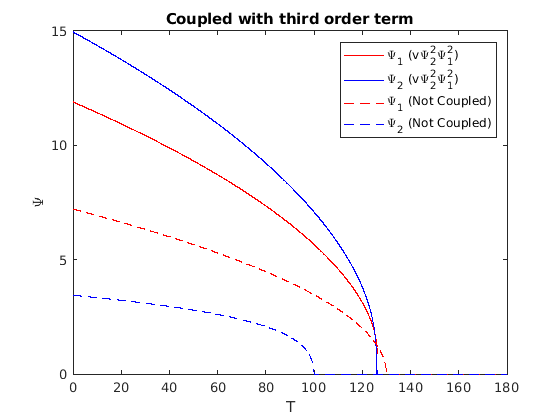

In [67]:
plot(T(1:i),Psi_1(T(1:i)),'r')
hold on
plot(T(1:i),Psi_2(T(1:i)),'b')

plot(T,psi1_nocoup,'r--')
plot(T,psi2_nocoup,'b--')
legend('\Psi_1 (v\Psi_2^2\Psi_1^2)','\Psi_2 (v\Psi_2^2\Psi_1^2)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')
title('Coupled with third order term')
xlabel('T')
ylabel('\Psi')

## Discussion

The extreme solutions under the coupling term, $\nu(|\psi_1|^2|\psi_2|^2)$, and without the third order term, behave in a normal manner, but the critical temperatures change, due to this new term, but with the third order term, they share the same critical temperature, and the bands are now coupled.
The extreme solutions under the coupling term, $-2\eta(|\psi_1||\psi_2|)$, and with or without the third order term behave in the same manner, but the extreme solutions at low temperatures are different, and at higher temperatures, the extreme solutions slow down and both bands approach the same critical temperature.

## Conclusion

In this project, we concluded that depending on our coupling term we get several different results and interesting behavious, and how the presence of a third order term comes into play, we check that the coupling terms alters the critical temperature in both cases.

## Graphs

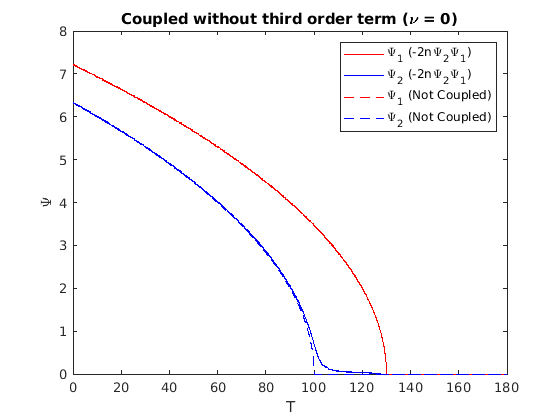

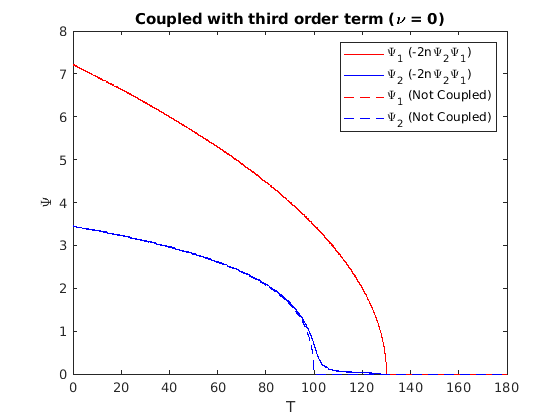

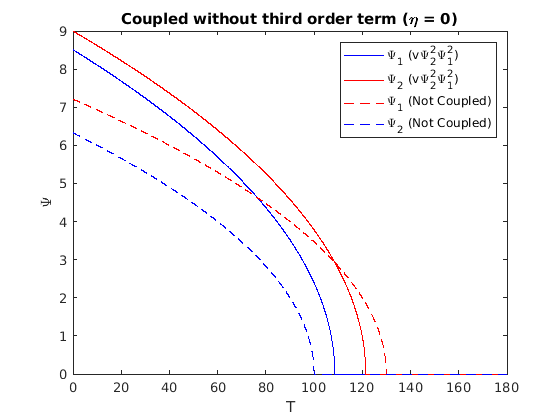

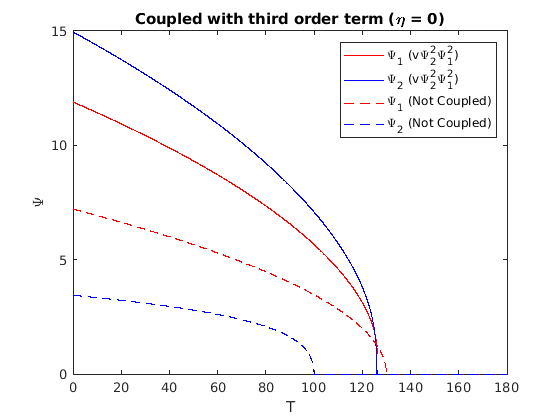

In [68]:
figure(1)
plot(T(1:length(psi_1_noto_n)),psi_1_noto_n,'r')
hold on
plot(T(1:length(psi_2_noto_n)),psi_2_noto_n,'b')
plot(T,psi1_nocoupto,'r--')
plot(T,psi2_nocoupto,'b--')
title("Coupled without third order term (\nu = 0)")
legend('\Psi_1 (-2n\Psi_2\Psi_1)','\Psi_2 (-2n\Psi_2\Psi_1)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')
xlabel('T')
ylabel('\Psi')


figure(2)
plot(T(1:length(psi_1)),psi_1,'r')
hold on
plot(T(1:length(psi_2)),psi_2,'b')
plot(T,psi1_nocoup,'r--')
plot(T,psi2_nocoup,'b--')
title('Coupled with third order term (\nu = 0)')
legend('\Psi_1 (-2n\Psi_2\Psi_1)','\Psi_2 (-2n\Psi_2\Psi_1)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')
xlabel('T')
ylabel('\Psi')

figure(3)
plot(T,psi_1_noto_v,'b')
hold on
plot(T,psi_2_noto_v,'r')
plot(T,psi1_nocoupto,'r--')
plot(T,psi2_nocoupto,'b--')
title('Coupled without third order term (\eta = 0)')
legend('\Psi_1 (v\Psi_2^2\Psi_1^2)','\Psi_2 (v\Psi_2^2\Psi_1^2)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')

xlabel('T')
ylabel('\Psi')


figure(4)
plot(T(1:i),Psi_1(T(1:i)),'r')
hold on
plot(T(1:i),Psi_2(T(1:i)),'b')
plot(T,psi1_nocoup,'r--')
plot(T,psi2_nocoup,'b--')
legend('\Psi_1 (v\Psi_2^2\Psi_1^2)','\Psi_2 (v\Psi_2^2\Psi_1^2)','\Psi_1 (Not Coupled)','\Psi_2 (Not Coupled)')
title('Coupled with third order term (\eta = 0)')
xlabel('T')
ylabel('\Psi')

As for the numeric algroith used in this project, it can be explained by breaking it into its individual tasks.

### define  $\psi_{max}(0)$
> For the first step, temperature zero ($T$=0), define arbitrary $\psi_{max}$ by eyeballing (maximum possible $\psi$ value)

### Compute $F_T$
> For every temperature ($T = [0:T_f]$), compute the F matrix ($F_T$) with elements of all possible $\psi$'s, $F_T(\psi^1_i,\psi^2_j)$ by cycling every possible $\psi = [0:\psi_{max}]$ (It will only find positive $\psi$ values.)

### Find $[\psi_1,\psi_2]_T$
> Find minimum value in $F_T$ matrix by comparing elements with their neighbors ,avoiding absolute minimums by ignoring matrix edges ($\psi_i = \psi_0$ or $\psi_i = \psi_{max}$).

> $[\psi_1,\psi_2]_T = [\psi^1_{min},\psi^2_{min}]_T$ where $[\psi^1_{min},\psi^2_{min}]$ are the minimizers for the $F_T$ matrix ($F_T[\psi^1_{min},\psi^2_{min}] = min(F_T)$), these are the desired system states for temperature $T$.

> Repeat for next Temperature  $T_{i+1} = T_i+dT$

### Extra optimization step 
> As $\psi^1(T)$ and $\psi^2(T)$ are stricly decreasing functions, $\psi_{max}(T+dT)$ will be $max(\psi^1(T),\psi^2(T))$, and $\psi_{min}(T+dT)$ (minimum possible value for $\psi(T+dT)$) can be defined as $\psi_{min}(T+dT) = min(\psi^1(T),\psi^2(T))$.

> This is an important step because, defining $N^2 = dim(F_t)$, having $n$ less possible $\psi$ value leads to a decrease of $n^2 + 2nN$ elements in the $F_T$ matrix. This will lead to a deceleration of calculation time for every consecutive $T$.


In [69]:

psi_1 = zeros(Tc1/dT-1,1);
psi_2 = zeros(Tc1/dT-1,1);

%Find Psi(T) values

PsiMax = 8; 
PsiMin = 0;

i = 0;
for t = T
    i=i+1;
    F_t_dimension(i) = (PsiMax-PsiMin)^2;

    start = tic;
    out = solve_F(alpha_0,beta,gama,n,Tc1,Tc2,t,PsiMax,PsiMin,dPsi);
    telapsed = toc(start);
    elapsed_time(i) = telapsed;

    psi_1(i) = out(1);
    psi_2(i) = out(2);
    PsiMax = max([psi_1(i),psi_2(i)]) * (1.3);
    PsiMin = min([psi_1(i),psi_2(i)]) * (0.30);
end

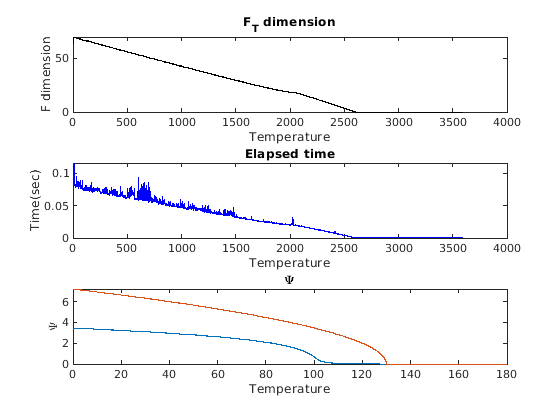

In [70]:
subplot(3,1,1)
plot(F_t_dimension , 'k-')
title("F_T dimension")
xlabel("Temperature")
ylabel("F dimension")

subplot(3,1,2)
plot(elapsed_time,'b')
title("Elapsed time")
xlabel("Temperature")
ylabel("Time(sec)")

subplot(3,1,3)
plot(T,psi_2)
hold on
plot(T,psi_1)
title("\Psi")
xlabel("Temperature")
ylabel("\Psi")